This can be executed in local environment using jupyter notebook

In [1]:
output = !python demo.py --image_folder demo_image/demo_image_ar --saved_mode saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111/best_accuracy.pth

,img,label,conf
0,,بكرة,1.0000
1,,الراقيه,0.9992
2,,تتريلات,0.5630
3,,غير,0.9999
4,,غذائية,0.9984
5,,دقائق,0.9959
6,,روز,0.9996

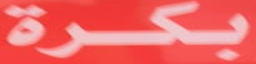
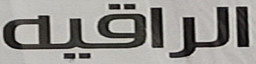
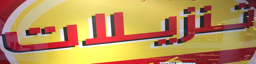
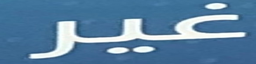
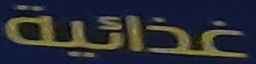
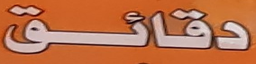
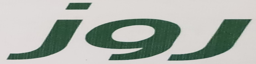

In [3]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

data = pd.DataFrame()
for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
  row = row.split('\t')
  filename = row[0].strip()
  label = row[1].strip()
  conf = row[2].strip()
  img = Image.open(filename)
  img = img.resize((256, 64))
  img_buffer = io.BytesIO()
  img.save(img_buffer, format="PNG")
  imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 

  data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
  data.loc[ind, 'id'] = filename
  data.loc[ind, 'label'] = label
  data.loc[ind, 'conf'] = conf

html_all = data.to_html(escape=False)
display(HTML(html_all))